In [2]:
# import packages
import os
import re
import glob
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

plt.rcParams['font.sans-serif'] = ['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus'] = False 

#### Section 1: 基础数据类型

In [2]:
# 数值类型
x = 5  # int
y = 3.14  # float
print(type(x))  # <class 'int'>
print(type(y))  # <class 'float'>

# 字符串类型
s = 'hello'
print(type(s))  # <class 'str'>

# 布尔类型
b = True
print(type(b))  # <class 'bool'>

# 列表类型
lst = [1, 2, 3, 4, 5]
print(type(lst))  # <class 'list'>

# 集合类型
st = {1, 2, 3, 4, 5}
print(type(st))  # <class 'set'>

# 字典类型
d = {'name': 'John', 'age': 25}
print(type(d))  # <class 'dict'>

# 空值类型
n = None
print(type(n))  # <class 'NoneType'>

<class 'int'>
<class 'float'>
<class 'str'>
<class 'bool'>
<class 'list'>
<class 'set'>
<class 'dict'>
<class 'NoneType'>


#### Section 2: 数据清洗

In [3]:
import pandas as pd

# 创建数据框
data = {'name': ['John', 'Mike', 'Sara', 'Emma', None],
        'age': [25, 35, 32, None, 45],
        'gender': ['M', 'M', 'F', 'F', None]}
df = pd.DataFrame(data)

# 删除缺失值
df_clean = df.dropna()

# 空值填充
df_fill = df.fillna('Unknown')

# 极值处理
df['age'] = df['age'].clip(lower=20, upper=40)

# 连接数据框
df1 = pd.DataFrame({'name': ['John', 'Mike'], 'score': [90, 80]})
df2 = pd.DataFrame({'name': ['Sara', 'Emma'], 'score': [95, 85]})
df_join = pd.concat([df1, df2])

#### Section 3: 数据可视化

C:\Users\yuanchen.b.wang\AppData\Local\Temp\ipykernel_10920\2915913848.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips["total_bill"], kde=True, color="g")


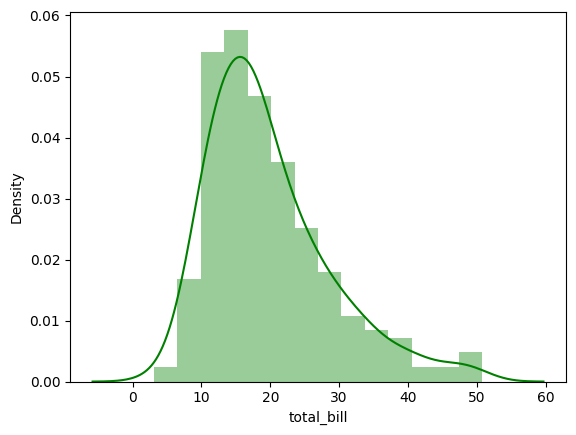

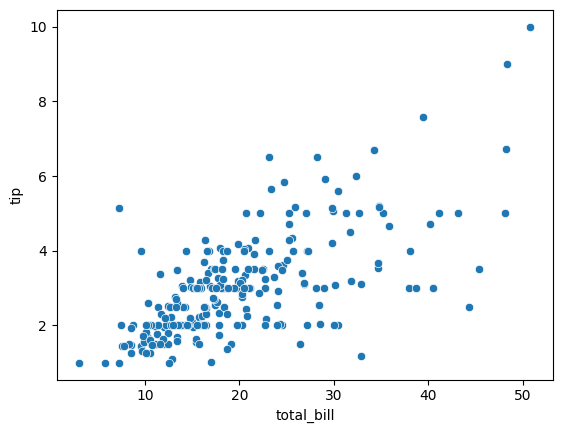

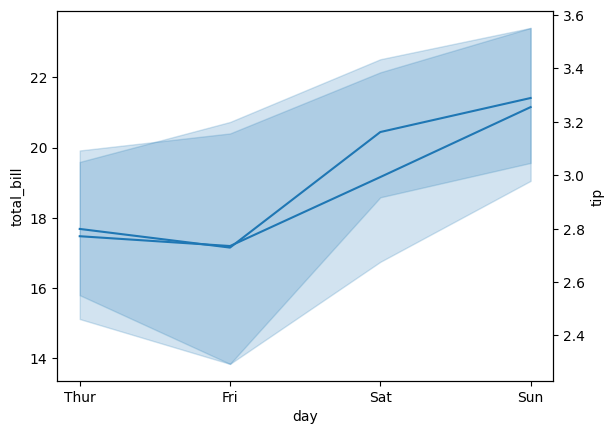

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据
tips = sns.load_dataset("tips")

# 单变量可视化
sns.distplot(tips["total_bill"], kde=True, color="g")
plt.show()

# 多变量可视化
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.show()

# 双纵轴可视化
fig, ax1 = plt.subplots()
sns.lineplot(x="day", y="total_bill", data=tips, ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(x="day", y="tip", data=tips, ax=ax2)
plt.show()

#### Section 4: 相关统计分析

In [10]:
# 计算相关系数
corr = tips[["total_bill", "tip"]].corr()
print(corr)

# 卡方检验
from scipy.stats import chi2_contingency

table = pd.crosstab(tips["time"], tips["smoker"])
chi2, p, dof, expected = chi2_contingency(table)
print("chi2:", chi2)
print("p:", p)

            total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000
chi2: 0.5053733928754354
p: 0.4771485672079724


#### Section 5: 练习题

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64


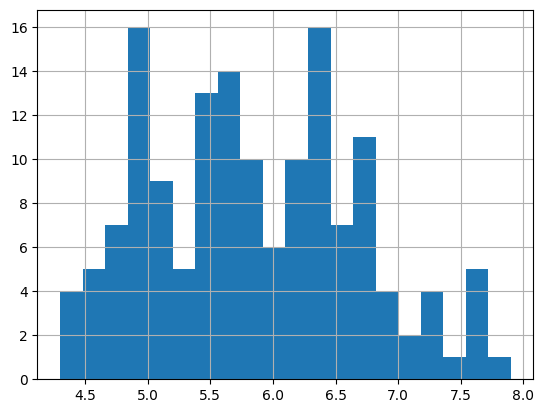

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


KeyError: 'class'

In [9]:
# 1. 读入数据集，计算缺失值比例
# 2. 绘制年龄分布直方图
# 3. 计算年龄和消费总额的相关系数
# 4. 卡方检验年龄和消费频次的关系

data_url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
iris = pd.read_csv(data_url)

# 1.
print(iris.isnull().sum() / len(iris))

# 2.
iris["sepal_length"].hist(bins=20)
plt.show()

# 3.
corr = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].corr()
print(corr)

# 4.
table = pd.crosstab(iris["species"], iris["class"])
chi2, p, dof, expected = chi2_contingency(table)
print("chi2:", chi2)
print("p:", p)